In [1]:
from analysis.datasets import *
from analysis.first_analysis import *
import matplotlib.pyplot as plt
import seaborn as sns
from analysis.explorative_analysis import *
from analysis.downloads import *

C:\Users\Manuel\Documents\Masterarbeit\src\analysis\first_analysis.py:207: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, pdf, 'r-', label=f'Normal Fit\n$\mu={mean:.2f}$, $\sigma={std:.2f}$')
C:\Users\Manuel\Documents\Masterarbeit\src\analysis\first_analysis.py:207: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, pdf, 'r-', label=f'Normal Fit\n$\mu={mean:.2f}$, $\sigma={std:.2f}$')


# Pre-analysis of wind speed data.

## 1. Comparison of historical data from merra2 with actual SCADA data of the turbine
- load the 2 datasets
- show a scatter plot
for one specific time interval

first attempt split merra2 into 10 min intervals: Result not so good
second attempt transform pennmanshiel data to 1h by taking the mean: Result better

In [49]:
combined_data = load_and_merge_wind_data(start_date="2016-09-14", end_date="2016-10-14")

Attempting to load file: ..\data\zenodo_turbine_data\raw\2016\Turbine_Data_Penmanshiel_09_2016-06-24_-_2017-01-01_1049.csv


### Scatter plot of all time intervals for the above time range

Index minimum: 2016-09-14 00:00:00
Index maximum: 2016-10-14 23:00:00


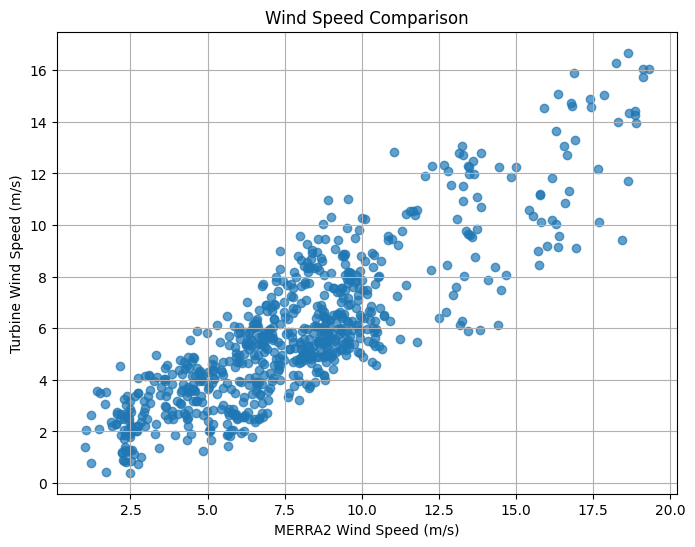

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [ ]:
analyze_wind_speed(combined_data)
x = np.linspace(0, 20, 100)  # Correct function name: linspace
y = x  # y = x for a simple diagonal line

# Plot the data
plt.subplot(x, y)  # Correct function name: plot
plt.title("Example Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

### Scatter plot of a specific time interval for a time range

In [46]:
combined_data_2 = load_and_merge_wind_data(start_date="2016-09-14", end_date="2016-10-14")

Attempting to load file: ..\data\zenodo_turbine_data\raw\2016\Turbine_Data_Penmanshiel_09_2016-06-24_-_2017-01-01_1049.csv


In [51]:
filtered_df = combined_data_2[combined_data_2.index.hour == 10]

Index minimum: 2016-09-14 10:00:00
Index maximum: 2016-10-14 10:00:00


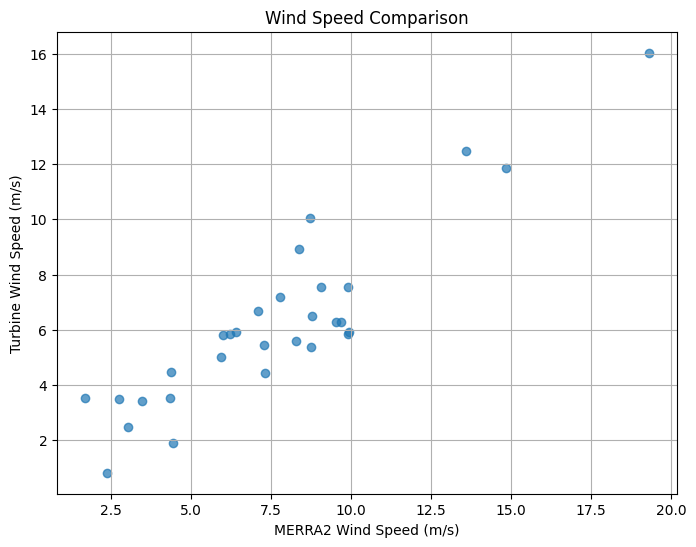

In [52]:
analyze_wind_speed(filtered_df)

## 2. d1 vs d0 for a 3 month time interval

In [7]:
d1_d0 = load_3_months_0day_1day_forecasts_zenodo()
d1_d0

Data loaded successfully. Shape of the dataframe: (9120, 8)


,wind_speed_10m,wind_speed_10m_previous_day1,wind_speed_80m,wind_speed_80m_previous_day1,wind_speed_120m,wind_speed_120m_previous_day1,wind_speed_180m,wind_speed_180m_previous_day1
time,,,,,,,,
2024-09-02 00:00:00,2.45,3.28,3.83,5.02,4.81,6.41,6.32,7.93
2024-09-02 00:15:00,2.38,3.19,3.79,4.94,4.78,6.33,6.43,7.85
2024-09-02 00:30:00,2.31,3.24,3.73,4.91,4.85,6.21,6.54,7.74
2024-09-02 00:45:00,2.25,3.22,3.68,4.96,4.88,6.27,6.62,7.78
2024-09-02 01:00:00,2.15,3.22,3.58,4.88,4.79,6.19,6.53,7.70
...,...,...,...,...,...,...,...,...
2024-12-05 22:45:00,8.81,8.81,14.37,14.37,17.14,17.14,19.96,19.96
2024-12-05 23:00:00,8.90,8.90,14.59,14.59,17.46,17.46,20.27,20.27
2024-12-05 23:15:00,8.93,8.93,14.71,14.71,17.61,17.61,20.35,20.35


In [8]:
d1_d0_ws_80 = d1_d0[["wind_speed_80m", "wind_speed_80m_previous_day1"]]
d1_d0_ws_80

,wind_speed_80m,wind_speed_80m_previous_day1
time,,
2024-09-02 00:00:00,3.83,5.02
2024-09-02 00:15:00,3.79,4.94
2024-09-02 00:30:00,3.73,4.91
2024-09-02 00:45:00,3.68,4.96
2024-09-02 01:00:00,3.58,4.88
...,...,...
2024-12-05 22:45:00,14.37,14.37
2024-12-05 23:00:00,14.59,14.59
2024-12-05 23:15:00,14.71,14.71


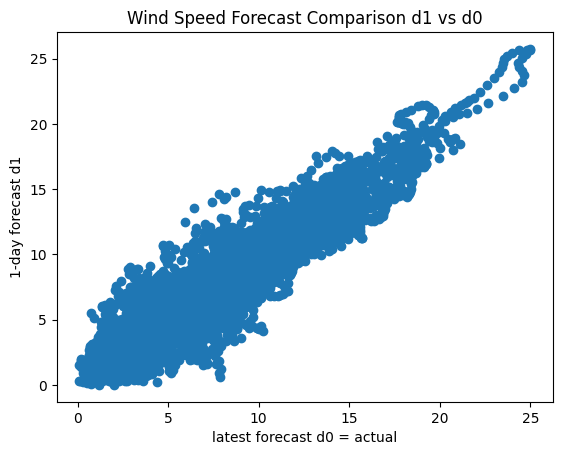

In [60]:
plt.scatter(d1_d0_ws_80['wind_speed_80m'], d1_d0_ws_80['wind_speed_80m_previous_day1'])
plt.title("Wind Speed Forecast Comparison d1 vs d0")
plt.xlabel("latest forecast d0 = actual")
plt.ylabel("1-day forecast d1")
plt.show()

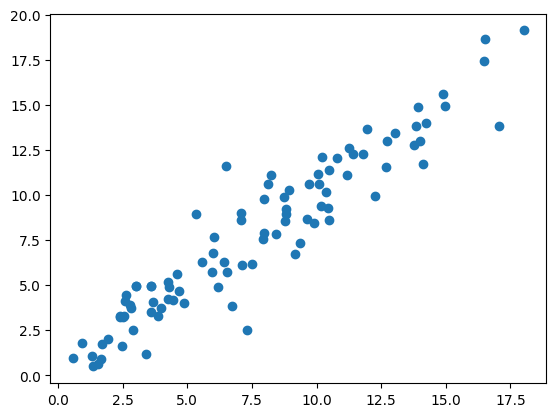

In [10]:
filtered_df = d1_d0_ws_80[(d1_d0_ws_80.index.hour == 9) & (d1_d0_ws_80.index.minute == 15)]
plt.scatter(filtered_df['wind_speed_80m'], filtered_df['wind_speed_80m_previous_day1'])

(array([ 1.,  1.,  2., 16., 28., 26., 12.,  6.,  2.,  1.]),
 array([-5.13 , -4.139, -3.148, -2.157, -1.166, -0.175,  0.816,  1.807,
         2.798,  3.789,  4.78 ]),
 <BarContainer object of 10 artists>)

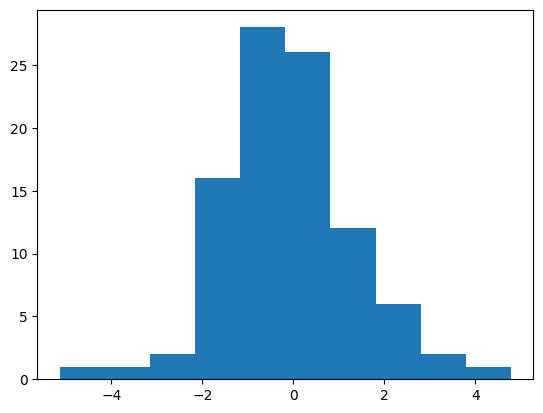

In [11]:
plt.hist(filtered_df['wind_speed_80m'] - filtered_df['wind_speed_80m_previous_day1'])

In [12]:
reshaped = minute_to_daily_50Hertz(d1_d0_ws_80)
reshaped

,wind_speed_80m_00_00,wind_speed_80m_00_15,wind_speed_80m_00_30,wind_speed_80m_00_45,wind_speed_80m_01_00,wind_speed_80m_01_15,wind_speed_80m_01_30,wind_speed_80m_01_45,wind_speed_80m_02_00,wind_speed_80m_02_15,...,wind_speed_80m_previous_day1_21_30,wind_speed_80m_previous_day1_21_45,wind_speed_80m_previous_day1_22_00,wind_speed_80m_previous_day1_22_15,wind_speed_80m_previous_day1_22_30,wind_speed_80m_previous_day1_22_45,wind_speed_80m_previous_day1_23_00,wind_speed_80m_previous_day1_23_15,wind_speed_80m_previous_day1_23_30,wind_speed_80m_previous_day1_23_45
date,,,,,,,,,,,,,,,,,,,,,
2024-09-02,3.83,3.79,3.73,3.68,3.58,3.45,3.16,3.01,2.86,2.86,...,10.39,10.18,10.08,9.98,9.81,9.71,9.41,9.10,8.67,8.16
2024-09-03,9.55,9.34,9.20,9.02,8.91,8.95,8.91,8.92,8.84,8.71,...,7.48,7.85,8.14,8.34,8.65,8.77,8.78,8.50,8.12,7.65
2024-09-04,6.51,6.61,6.82,7.02,7.12,7.11,7.01,6.80,6.60,6.30,...,8.01,7.95,7.91,7.98,8.14,8.32,8.41,8.32,8.19,8.01
2024-09-05,6.31,6.71,7.17,7.63,8.01,8.42,8.73,9.08,9.40,9.84,...,9.77,9.90,9.80,9.60,9.31,9.12,8.81,8.59,8.37,8.15
2024-09-06,8.29,8.22,8.13,7.94,7.84,7.62,7.49,7.24,6.90,6.43,...,3.20,3.30,3.41,3.41,3.31,3.10,3.00,2.91,2.82,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,14.92,15.01,14.99,14.75,14.51,14.06,13.40,12.74,12.32,12.04,...,6.94,6.62,6.31,5.83,5.13,4.50,4.18,4.33,4.85,5.46
2024-12-02,6.37,6.63,6.75,6.96,7.13,7.27,7.29,7.32,7.17,6.94,...,7.65,7.63,7.51,7.38,7.26,7.22,7.21,7.40,7.60,7.90
2024-12-03,7.20,6.90,6.62,6.36,6.12,5.85,5.65,5.43,5.32,5.36,...,9.87,10.57,10.98,11.00,10.85,10.55,9.99,9.39,9.06,9.32


In [13]:
first_96 = reshaped.iloc[:, :96]

# Extract the next 96 columns
next_96 = reshaped.iloc[:, 96:192]

# Calculate the difference
diff_d0_d1 = first_96.values - next_96.values

# Create a new DataFrame with the differences and assign column names
diff_d0_d1 = pd.DataFrame(diff_d0_d1, index=reshaped.index, columns=[f"diff_{col}" for col in first_96.columns])

# Display the resulting DataFrame
diff_d0_d1

,diff_wind_speed_80m_00_00,diff_wind_speed_80m_00_15,diff_wind_speed_80m_00_30,diff_wind_speed_80m_00_45,diff_wind_speed_80m_01_00,diff_wind_speed_80m_01_15,diff_wind_speed_80m_01_30,diff_wind_speed_80m_01_45,diff_wind_speed_80m_02_00,diff_wind_speed_80m_02_15,...,diff_wind_speed_80m_21_30,diff_wind_speed_80m_21_45,diff_wind_speed_80m_22_00,diff_wind_speed_80m_22_15,diff_wind_speed_80m_22_30,diff_wind_speed_80m_22_45,diff_wind_speed_80m_23_00,diff_wind_speed_80m_23_15,diff_wind_speed_80m_23_30,diff_wind_speed_80m_23_45
date,,,,,,,,,,,,,,,,,,,,,
2024-09-02,-1.19,-1.15,-1.18,-1.28,-1.30,-1.38,-1.61,-1.65,-1.67,-1.36,...,0.34,0.24,0.04,-0.05,-0.14,-0.19,0.06,0.37,0.88,1.47
2024-09-03,1.90,2.35,2.94,3.36,3.54,3.49,3.19,2.75,2.44,2.27,...,-0.75,-0.74,-0.74,-0.84,-1.15,-1.27,-1.38,-1.30,-1.22,-1.05
2024-09-04,-0.75,-0.45,-0.02,0.27,0.49,0.60,0.61,0.42,0.15,-0.53,...,-3.09,-3.07,-3.08,-3.15,-3.44,-3.62,-3.62,-3.31,-2.73,-2.11
2024-09-05,-1.79,-1.67,-1.62,-1.57,-1.42,-1.01,-0.45,0.19,0.61,0.99,...,0.22,0.02,0.05,0.03,0.05,-0.10,0.00,0.04,0.12,0.30
2024-09-06,0.26,0.29,0.25,0.12,0.12,0.12,0.21,0.18,0.08,-0.05,...,-0.20,-0.30,-0.40,-0.40,-0.17,0.06,0.28,0.46,0.65,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,1.90,2.24,2.43,2.49,2.44,2.29,1.89,1.50,1.28,1.02,...,0.55,0.23,0.13,0.33,0.81,1.27,1.46,1.26,0.81,0.58
2024-12-02,0.58,0.90,1.37,1.76,1.91,1.38,0.45,-0.37,-0.80,-0.92,...,2.31,2.37,2.36,2.27,2.08,1.82,1.52,0.92,0.42,-0.29
2024-12-03,-0.71,-0.82,-0.71,-0.50,-0.37,-0.37,-0.20,-0.15,-0.04,0.16,...,0.51,-0.76,-1.62,-1.95,-2.00,-1.94,-1.61,-1.40,-1.63,-2.33


(array([ 3.,  1.,  8., 14., 33., 23., 10.,  1.,  1.,  1.]),
 array([-4.72 , -3.735, -2.75 , -1.765, -0.78 ,  0.205,  1.19 ,  2.175,
         3.16 ,  4.145,  5.13 ]),
 <BarContainer object of 10 artists>)

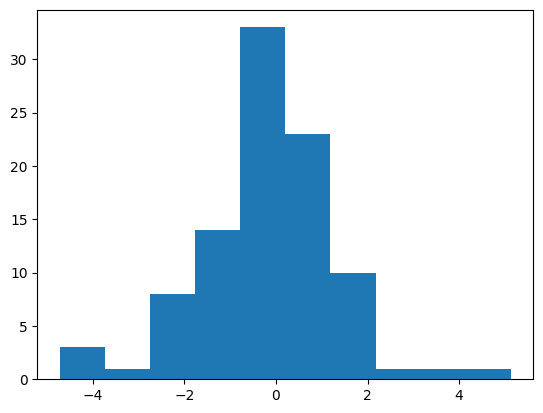

In [14]:
plt.hist(diff_d0_d1['diff_wind_speed_80m_13_30'])

In [15]:
from scipy.stats import t

# Initialize a dictionary to store fitted parameters for each column
t_params = {}

# Fit t-distribution for each column
for col in diff_d0_d1.columns:
    # Fit the t-distribution: returns (df, loc, scale)
    params = t.fit(diff_d0_d1[col].dropna())  # Drop NaN values for fitting
    t_params[col] = {
        "df": params[0],  # Degrees of freedom
        "loc": params[1],  # Location parameter
        "scale": params[2]  # Scale parameter
    }

# Convert the parameters dictionary to a DataFrame for better visualization
t_params_df = pd.DataFrame(t_params).T

# Display the fitted parameters for each column

In [16]:
t_params_df[t_params_df['df'] < 3.5]

,df,loc,scale
diff_wind_speed_80m_03_00,3.130555,0.257674,1.057378
diff_wind_speed_80m_03_15,3.107711,0.289310,1.061630
diff_wind_speed_80m_12_45,3.395687,-0.180561,1.086465
diff_wind_speed_80m_13_15,3.034748,-0.197583,1.012303
diff_wind_speed_80m_13_30,3.079038,-0.122464,1.015734
diff_wind_speed_80m_15_15,3.316565,0.098982,1.014437
diff_wind_speed_80m_18_00,3.485426,0.047339,1.398817
diff_wind_speed_80m_18_15,3.294719,0.048290,1.372287
diff_wind_speed_80m_18_30,3.307759,0.054087,1.328947
diff_wind_speed_80m_19_45,3.238030,0.145957,1.168221


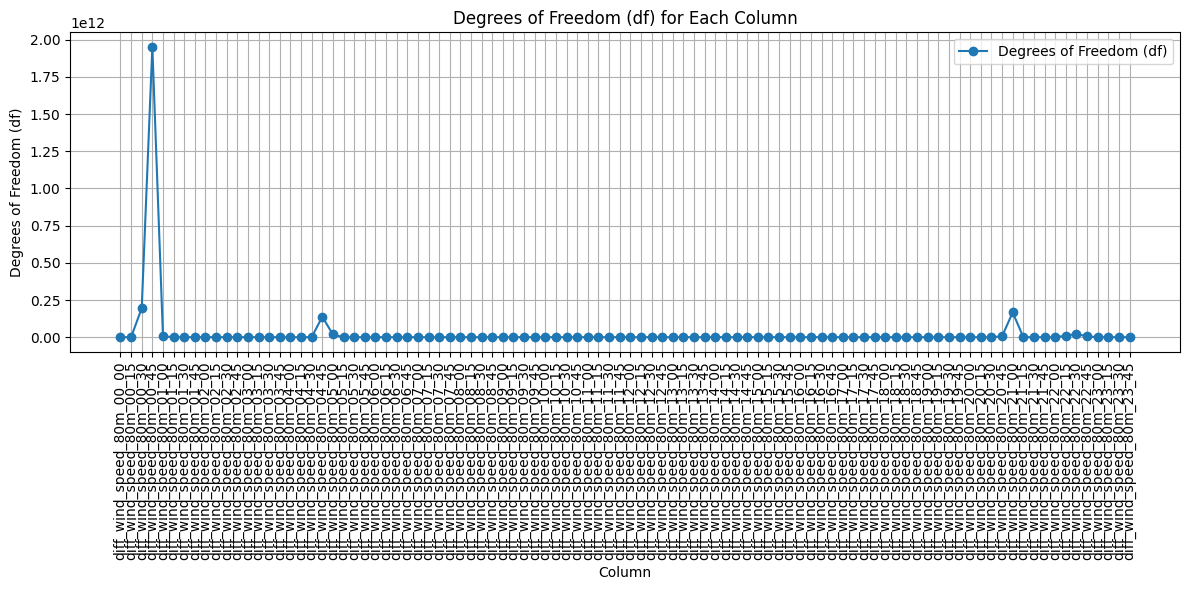

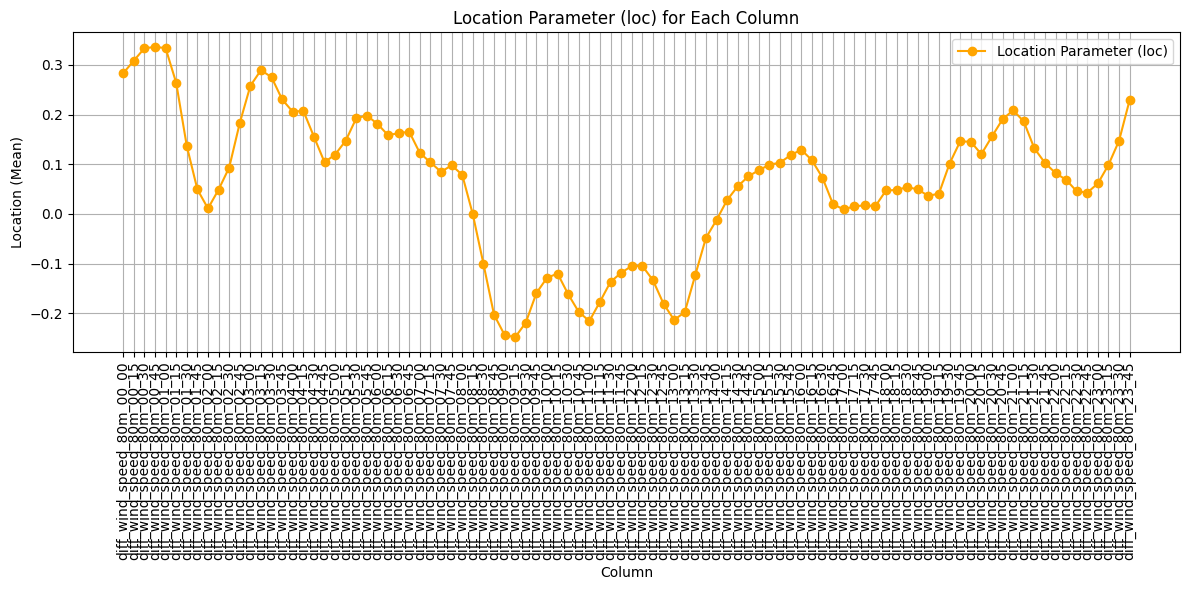

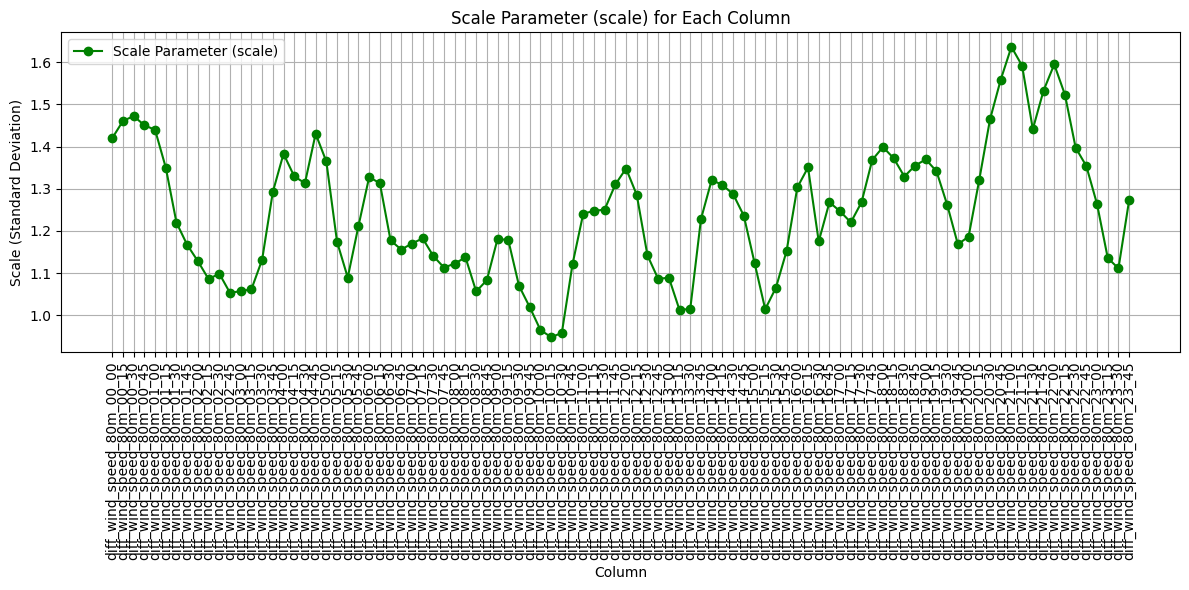

In [17]:
# Plot Degrees of Freedom (df)
plt.figure(figsize=(12, 6))
plt.plot(t_params_df.index, t_params_df['df'], marker='o', label='Degrees of Freedom (df)')
plt.xticks(rotation=90)  # Rotate column labels for readability
plt.title('Degrees of Freedom (df) for Each Column')
plt.xlabel('Column')
plt.ylabel('Degrees of Freedom (df)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot Location Parameter (loc)
plt.figure(figsize=(12, 6))
plt.plot(t_params_df.index, t_params_df['loc'], marker='o', color='orange', label='Location Parameter (loc)')
plt.xticks(rotation=90)
plt.title('Location Parameter (loc) for Each Column')
plt.xlabel('Column')
plt.ylabel('Location (Mean)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot Scale Parameter (scale)
plt.figure(figsize=(12, 6))
plt.plot(t_params_df.index, t_params_df['scale'], marker='o', color='green', label='Scale Parameter (scale)')
plt.xticks(rotation=90)
plt.title('Scale Parameter (scale) for Each Column')
plt.xlabel('Column')
plt.ylabel('Scale (Standard Deviation)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [18]:
d1_d0_ws_80.describe()

,wind_speed_80m,wind_speed_80m_previous_day1
count,9120.000000,9120.000000
mean,7.820571,7.781955
std,4.289155,4.271849
min,0.100000,0.000000
25%,4.250000,4.400000
50%,7.520000,7.520000
75%,10.690000,10.780000
max,25.000000,25.750000


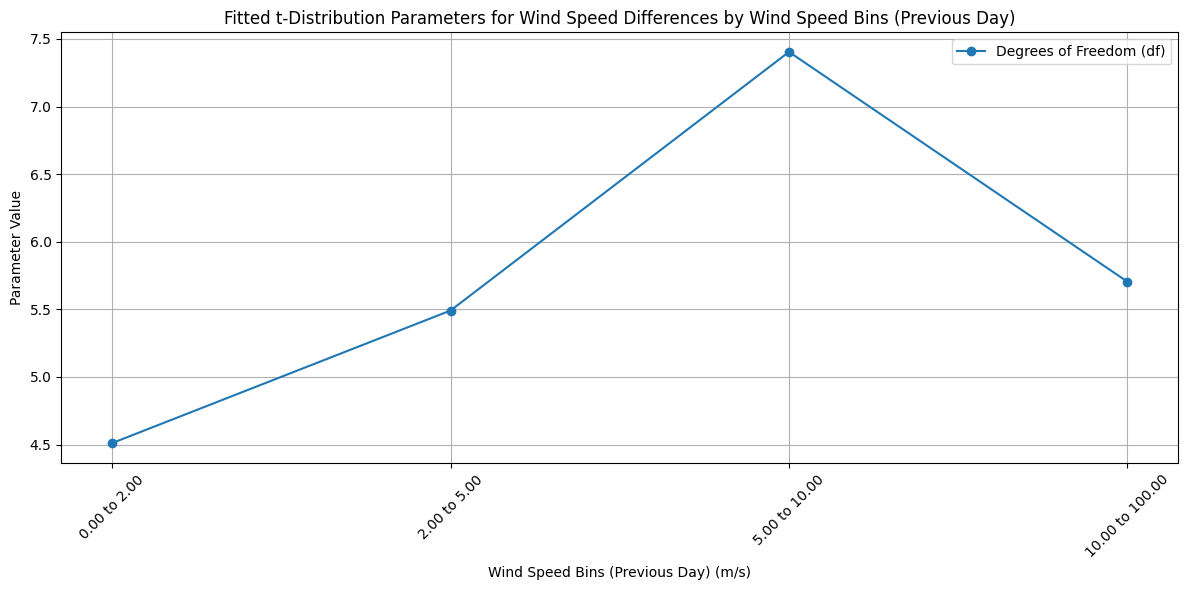

,bin,df,loc,scale
0,0.00 to 2.00,4.510477,0.623617,0.923003
1,2.00 to 5.00,5.491206,0.170069,1.135723
2,5.00 to 10.00,7.404234,0.031372,1.337668
3,10.00 to 100.00,5.703890,-0.197043,1.265634


In [62]:
# Step 1: Define bins based on the second wind speed column (wind_speed_80m_previous_day1)
#bin_edges = np.linspace(d1_d0_ws_80['wind_speed_80m_previous_day1'].min(), d1_d0_ws_80['wind_speed_80m_previous_day1'].max(), 6)
bin_edges = [0, 2, 5, 10, 100]
bin_labels = [f"{bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}" for i in range(len(bin_edges) - 1)]

# Step 2: Digitize the wind_speed_80m_previous_day1 column to assign it to bins
bin_indices = np.digitize(d1_d0_ws_80['wind_speed_80m_previous_day1'], bins=bin_edges) - 1  # -1 to match bin_labels indexing

# Step 3: Calculate the difference between the two wind speed columns
d1_d0_ws_80['difference'] = d1_d0_ws_80['wind_speed_80m'] - d1_d0_ws_80['wind_speed_80m_previous_day1']

# Step 4: Group the data by bins of wind_speed_80m_previous_day1 and calculate the difference
binned_data = {bin_labels[i]: d1_d0_ws_80['difference'][bin_indices == i] for i in range(len(bin_labels))}

# Step 5: Fit a t-distribution for each bin and store the parameters (df, loc, scale)
fitted_params = []
for bin_name, data in binned_data.items():
    if len(data) > 0:
        df_t, loc, scale = stats.t.fit(data)  # Fit t-distribution
        fitted_params.append({"bin": bin_name, "df": df_t, "loc": loc, "scale": scale})
    else:
        # Handle empty bins (if any)
        fitted_params.append({"bin": bin_name, "df": np.nan, "loc": np.nan, "scale": np.nan})

# Convert the results into a DataFrame for easier analysis
fitted_params_df = pd.DataFrame(fitted_params)

# Step 6: Plot the fitted parameters for each bin
plt.figure(figsize=(12, 6))
plt.plot(fitted_params_df["bin"], fitted_params_df["df"], marker="o", label="Degrees of Freedom (df)")
#plt.plot(fitted_params_df["bin"], fitted_params_df["loc"], marker="o", label="Location (Mean)")
#plt.plot(fitted_params_df["bin"], fitted_params_df["scale"], marker="o", label="Scale (Std Dev)")
plt.title("Fitted t-Distribution Parameters for Wind Speed Differences by Wind Speed Bins (Previous Day)")
plt.xlabel("Wind Speed Bins (Previous Day) (m/s)")
plt.ylabel("Parameter Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the fitted parameters DataFrame
fitted_params_df


(array([  12.,   70.,  243., 1020., 3187., 3224., 1085.,  222.,   51.,
           6.]),
 array([-7.13 , -5.697, -4.264, -2.831, -1.398,  0.035,  1.468,  2.901,
         4.334,  5.767,  7.2  ]),
 <BarContainer object of 10 artists>)

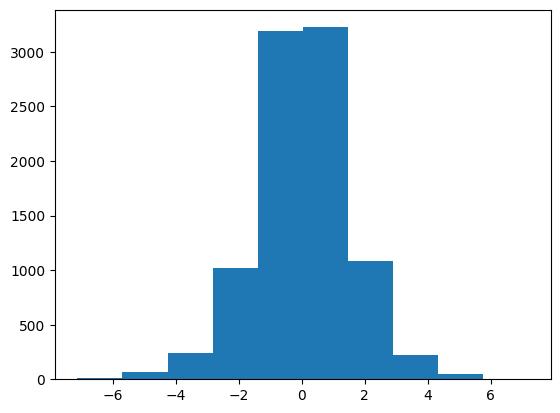

In [ ]:
plt.hist(d1_d0_ws_80['difference'])

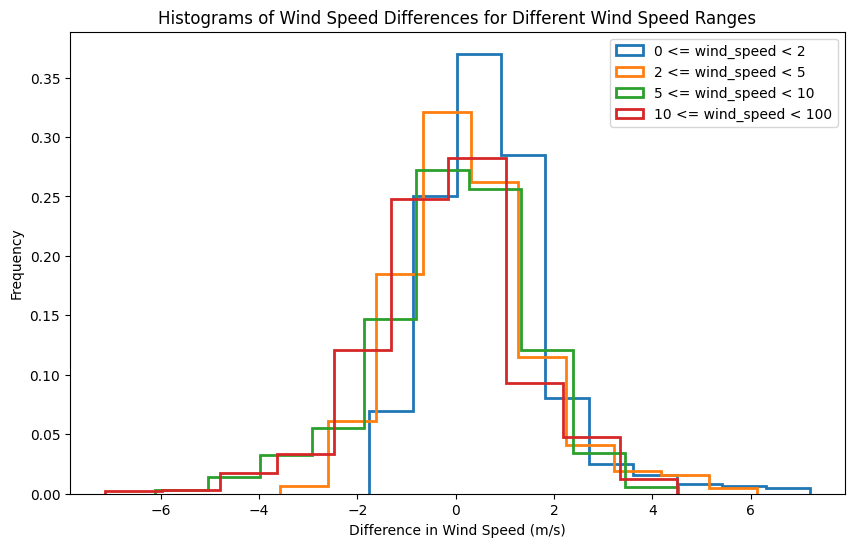

In [43]:
constraint1 = d1_d0_ws_80[(d1_d0_ws_80['wind_speed_80m_previous_day1'] >= 0) & (d1_d0_ws_80['wind_speed_80m_previous_day1'] < 2)]
constraint2 = d1_d0_ws_80[(d1_d0_ws_80['wind_speed_80m_previous_day1'] >= 2) & (d1_d0_ws_80['wind_speed_80m_previous_day1'] < 5)]
constraint3 = d1_d0_ws_80[(d1_d0_ws_80['wind_speed_80m_previous_day1'] >= 5) & (d1_d0_ws_80['wind_speed_80m_previous_day1'] < 10)]
constraint4 = d1_d0_ws_80[(d1_d0_ws_80['wind_speed_80m_previous_day1'] >= 10) & (d1_d0_ws_80['wind_speed_80m_previous_day1'] < 100)]

plt.figure(figsize=(10, 6))  # Example: width = 10 inches, height = 6 inches


# Plot histograms for each constraint without filling
plt.hist(constraint1['difference'], histtype='step', label='0 <= wind_speed < 2', linestyle='-', linewidth=2, density=True)
plt.hist(constraint2['difference'], histtype='step', label='2 <= wind_speed < 5', linestyle='-', linewidth=2, density=True)
plt.hist(constraint3['difference'], histtype='step', label='5 <= wind_speed < 10', linestyle='-', linewidth=2, density=True)
plt.hist(constraint4['difference'], histtype='step', label='10 <= wind_speed < 100', linestyle='-', linewidth=2, density=True)



# Add labels and legend
plt.xlabel('Difference in Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Histograms of Wind Speed Differences for Different Wind Speed Ranges')
plt.legend()

# Show the plot
plt.show()


In [23]:
d1_d0_ws_80

,wind_speed_80m,wind_speed_80m_previous_day1,difference
time,,,
2024-09-02 00:00:00,3.83,5.02,-1.19
2024-09-02 00:15:00,3.79,4.94,-1.15
2024-09-02 00:30:00,3.73,4.91,-1.18
2024-09-02 00:45:00,3.68,4.96,-1.28
2024-09-02 01:00:00,3.58,4.88,-1.30
...,...,...,...
2024-12-05 22:45:00,14.37,14.37,0.00
2024-12-05 23:00:00,14.59,14.59,0.00
2024-12-05 23:15:00,14.71,14.71,0.00
